#### Import libraries and read in dataframes

In [4]:
import pandas as pd

In [6]:
bios = pd.read_csv('bios.csv')
bios_locs = pd.read_csv('bios_locs.csv')
noc_regions = pd.read_csv('noc_regions.csv')
populations = pd.read_csv('populations.csv')
results = pd.read_csv('results.csv')

#### Exploratory data analysis

In [9]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [11]:
results[results['as'] == 'Galen Rupp']

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal
247430,2008.0,Summer,Athletics,"10,000 metres, Men (Olympic)",Galen Rupp,114968,USA,NaN,13.0,False,NaN
247431,2012.0,Summer,Athletics,"5,000 metres, Men (Olympic)",Galen Rupp,114968,USA,NaN,7.0,False,NaN
247432,2012.0,Summer,Athletics,"10,000 metres, Men (Olympic)",Galen Rupp,114968,USA,NaN,2.0,False,Silver
247433,2016.0,Summer,Athletics,"10,000 metres, Men (Olympic)",Galen Rupp,114968,USA,NaN,5.0,False,NaN
247434,2016.0,Summer,Athletics,"Marathon, Men (Olympic)",Galen Rupp,114968,USA,NaN,3.0,False,Bronze
247435,2020.0,Summer,Athletics,"Marathon, Men (Olympic)",Galen Rupp,114968,USA,NaN,8.0,False,NaN


In [13]:
bios_locs.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,lat,long
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,44.841225,-0.580036
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,49.004971,1.910084
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,43.471144,-1.552727
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,48.877480,2.317650
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,51.457027,-0.193261


In [15]:
noc_regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [17]:
populations.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
1,Africa Eastern and Southern,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
2,Afghanistan,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
3,Africa Western and Central,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
4,Angola,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0


#### How many medals has each country won since 1896?

##### Method 1

In [21]:
results['medal_count'] = results['medal'].notna().astype(int)
results.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal,medal_count
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN,0
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN,0
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN,0
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN,0
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN,0


In [23]:
medal_totals = results.groupby('noc')['medal_count'].sum().reset_index()
medal_totals.sort_values(by='medal_count', ascending=False).reset_index(drop=True)

,noc,medal_count
0,USA,5995
1,URS,2480
2,GER,2399
3,GBR,2199
4,FRA,2009
...,...,...
225,GEQ,0
226,GUI,0
227,GUM,0
228,PNG,0


In [25]:
# results[results['discipline'].str.contains('Basketball', na=False)]

In [27]:
medal_totals = results.groupby('noc')['medal_count'].sum().reset_index()
real_medal_counts = results.groupby(['year', 'event', 'noc', 'medal'])['medal_count'].sum().reset_index()
real_medal_counts['counter'] = 1

In [29]:
medal_totals = real_medal_counts.groupby('noc')['counter'].sum().reset_index()
medal_totals.sort_values(by='counter', ascending=False).reset_index(drop=True)

,noc,counter
0,USA,2954
1,URS,1177
2,GER,1067
3,GBR,955
4,FRA,917
...,...,...
151,SAM,1
152,SEN,1
153,TGA,1
154,SUD,1


##### Method 2

In [42]:
medals = results[(results['medal'].notna()) & (~results['event'].str.endswith('(YOG)'))]

In [44]:
medals_filtered = medals.drop_duplicates(['year', 'type', 'discipline', 'noc', 'event', 'medal'])

In [46]:
print(medals_filtered.groupby(['noc', 'year'])['medal'].value_counts().to_string())

noc  year    medal 
AFG  2008.0  Bronze     1
     2012.0  Bronze     1
AHO  1988.0  Silver     1
ALG  1984.0  Bronze     2
     1992.0  Bronze     1
             Gold       1
     1996.0  Gold       2
             Bronze     1
     2000.0  Bronze     3
             Gold       1
             Silver     1
     2008.0  Bronze     1
             Silver     1
     2012.0  Gold       1
     2016.0  Silver     2
ANZ  1908.0  Bronze     2
             Silver     2
             Gold       1
     1912.0  Bronze     3
             Gold       2
             Silver     2
ARG  1924.0  Silver     3
             Bronze     2
             Gold       1
     1928.0  Gold       3
             Silver     3
             Bronze     1
     1932.0  Gold       3
             Silver     1
     1936.0  Bronze     3
             Gold       2
             Silver     2
     1948.0  Gold       3
             Silver     3
             Bronze     1
     1952.0  Bronze     2
             Silver     2
             Gold 

In [38]:
medals_filtered.groupby(['noc', 'year'])['medal'].value_counts().loc['MEX']

year    medal 
1900.0  Bronze    1
1932.0  Silver    2
1936.0  Bronze    3
1948.0  Bronze    3
        Gold      2
        Silver    1
1952.0  Silver    1
1956.0  Bronze    1
        Gold      1
1960.0  Bronze    1
1964.0  Bronze    1
1968.0  Bronze    3
        Gold      3
        Silver    3
1972.0  Silver    1
1976.0  Bronze    1
        Gold      1
1980.0  Bronze    3
        Silver    1
1984.0  Silver    3
        Gold      2
        Bronze    1
1988.0  Bronze    2
1992.0  Silver    1
1996.0  Bronze    1
2000.0  Bronze    3
        Silver    2
        Gold      1
2004.0  Silver    3
        Bronze    1
2008.0  Bronze    2
        Gold      2
2010.0  Bronze    1
2012.0  Bronze    4
        Silver    3
        Gold      1
2014.0  Bronze    2
        Gold      1
        Silver    1
2016.0  Silver    3
        Bronze    2
2020.0  Bronze    3
        Gold      1
Name: count, dtype: int64

In [50]:
medals_filtered.groupby(['noc', 'year'])['medal'].value_counts().loc['MEX'].sum()

73

In [64]:
# Example query function
medals.query('year == 2012 and noc == "MEX"')

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal,medal_count
222583,2012.0,Summer,Football (Football),"Football, Men (Olympic)",José Corona,102713,MEX,Mexico,1.0,False,Gold,1
233399,2012.0,Summer,Diving (Aquatics),"Springboard, Women (Olympic)",Laura Sánchez,107917,MEX,NaN,3.0,False,Bronze,1
233407,2012.0,Summer,Diving (Aquatics),"Synchronized Platform, Women (Olympic)",Paola Espinosa,107918,MEX,Alejandra Orozco,2.0,False,Silver,1
241082,2012.0,Summer,Archery,"Individual, Women (Olympic)",Aída Román,111484,MEX,NaN,2.0,False,Silver,1
241093,2012.0,Summer,Archery,"Individual, Women (Olympic)",Mariana Avitia,111486,MEX,NaN,3.0,False,Bronze,1
249734,2012.0,Summer,Diving (Aquatics),"Synchronized Platform, Men (Olympic)",Germán Sánchez,116094,MEX,Iván García,2.0,False,Silver,1
250035,2012.0,Summer,Weightlifting,"Middleweight, Women (Olympic)",Luz Acosta,116269,MEX,NaN,3.0,False,Bronze,1
252074,2012.0,Summer,Taekwondo,"Heavyweight, Women (Olympic)",María Espinoza,117404,MEX,NaN,3.0,True,Bronze,1
259241,2012.0,Summer,Football (Football),"Football, Men (Olympic)",Raúl Jiménez,120285,MEX,Mexico,1.0,False,Gold,1
264650,2012.0,Summer,Diving (Aquatics),"Synchronized Platform, Women (Olympic)",Alejandra Orozco,123301,MEX,Paola Espinosa,2.0,False,Silver,1


#### Visualize where each athlete was born on a map?

In [71]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [77]:
from geopy.geocoders import Nominatim

In [79]:
def get_coordinates(city, region, country):
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.geocode(f"{city}, {region}, {country}")
    if location:
        latitude = location.latitude
        longitude = location.longitude
        return latitude, longitude
    else:
        return None

In [93]:
id_1 = get_coordinates('Lubbock', 'Texas', 'United States')
id_1

(33.5855677, -101.8470215)

In [99]:
def get_coordinates(city, region, country):
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.geocode(f"{city}, {region}, {country}")
    if location:
        latitude = location.latitude
        longitude = location.longitude
        return latitude, longitude
    else:
        return None

bios_locs = bios.copy()

bios_locs['lat'] = None
bios_locs['lons'] = None

for index, row in bios.iterrows():
    coordinates = get_coordinates(row['born_city'],row['born_region'], row['born_country'])
    if coordinates:
        lat, long = coordinates
        bios_locs.loc[index, 'lat'] = lat
        bios_locs.loc[index, 'long'] = long

    if index != 0 and index % 100 == 0:
        bios_locs.to_csv(f'updated_bios_{index}.csv', index=False)
        break
    
    break

#### Q4

In [102]:
results.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal,medal_count
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN,0
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN,0
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN,0
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN,0
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN,0


In [104]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


In [106]:
results[results['as'] == 'Galen Rupp']

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal,medal_count
247430,2008.0,Summer,Athletics,"10,000 metres, Men (Olympic)",Galen Rupp,114968,USA,NaN,13.0,False,NaN,0
247431,2012.0,Summer,Athletics,"5,000 metres, Men (Olympic)",Galen Rupp,114968,USA,NaN,7.0,False,NaN,0
247432,2012.0,Summer,Athletics,"10,000 metres, Men (Olympic)",Galen Rupp,114968,USA,NaN,2.0,False,Silver,1
247433,2016.0,Summer,Athletics,"10,000 metres, Men (Olympic)",Galen Rupp,114968,USA,NaN,5.0,False,NaN,0
247434,2016.0,Summer,Athletics,"Marathon, Men (Olympic)",Galen Rupp,114968,USA,NaN,3.0,False,Bronze,1
247435,2020.0,Summer,Athletics,"Marathon, Men (Olympic)",Galen Rupp,114968,USA,NaN,8.0,False,NaN,0


In [122]:
bios['count'] = 1

In [ ]:
# Group the number of medailits 

In [128]:
texas_cities = bios[bios['born_region'] == 'Texas'].groupby('born_city')['count'].sum().reset_index()
texas_cities.sort_values(by='count', ascending=False).reset_index(drop=True)

,born_city,count
0,Houston,91
1,Dallas,46
2,San Antonio,21
3,Fort Worth,12
4,El Paso,7
...,...,...
122,Center,1
123,Clarksville,1
124,Coleman,1
125,Hidalgo County,1


In [130]:
texas_cities[texas_cities['born_city'] == 'Lubbock']

,born_city,count
75,Lubbock,5


In [132]:
bios[bios['born_city'] == 'Lubbock']

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,count
40556,40865,Marc Schneider,1973-04-28,Lubbock,Texas,USA,United States,187.0,72.0,NaN,1
105555,106607,Jonathan Johnson,1982-03-05,Lubbock,Texas,USA,United States,175.0,70.0,NaN,1
117197,118671,Justin Olsen,1987-04-16,Lubbock,Texas,USA,United States,188.0,NaN,NaN,1
124750,127081,Marquise Goodwin,1990-11-19,Lubbock,Texas,USA,United States,178.0,82.0,NaN,1
133294,136233,Brad Adkins,1993-12-30,Lubbock,Texas,USA,United States,188.0,80.0,NaN,1


#### Given the event and year return the medalists from the event?

In [139]:
all_events = results.event.unique()
all_events

array(['Singles, Men (Olympic)', 'Doubles, Men (Olympic)',
       'Doubles, Mixed (Olympic)', ..., 'Kumite, ≤61 kg, Women (Olympic)',
       'Kata, Men (Olympic)', 'Kata, Women (Olympic)'], dtype=object)

In [ ]:
def return_medalists(event, year):
    

In [141]:
results.medal.unique()

array([nan, 'Bronze', 'Silver', 'Gold'], dtype=object)

#### Merge the number of each type of medal an athlete won with the bios df?

In [146]:
results_medals = pd.get_dummies(results, columns=['medal'], dtype='int')
results_medals.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal_count,medal_Bronze,medal_Gold,medal_Silver
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,0,0,0,0
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,0,0,0,0
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,0,0,0,0
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,0,0,0,0
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,0,0,0,0


In [166]:
ind_medals = results_medals.groupby(['athlete_id', 'as'])[['medal_Gold', 'medal_Silver', 'medal_Bronze']].sum().reset_index()

In [168]:
ind_medals['total_medals'] = ind_medals['medal_Gold'] + ind_medals['medal_Silver'] + ind_medals['medal_Bronze']

In [170]:
ind_medals = ind_medals.sort_values(by='total_medals', ascending=False).reset_index(drop=True)

In [172]:
ind_medals.head()

,athlete_id,as,medal_Gold,medal_Silver,medal_Bronze,total_medals
0,93860,Michael Phelps,23,3,2,28
1,29198,Larisa Latynina,9,5,4,18
2,129061,Emma McKeon,6,4,7,17
3,31235,Nikolay Andrianov,7,5,3,15
4,101008,Marit Bjørgen,8,4,3,15


In [180]:
bios

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,count
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1
...,...,...,...,...,...,...,...,...,...,...,...
145495,149222,Polina Luchnikova,2002-01-30,Serov,Sverdlovsk,RUS,ROC,167.0,61.0,NaN,1
145496,149223,Valeriya Merkusheva,1999-09-20,Moskva (Moscow),Moskva,RUS,ROC,168.0,65.0,NaN,1
145497,149224,Yuliya Smirnova,1998-05-08,Kotlas,Arkhangelsk,RUS,ROC,163.0,55.0,NaN,1
145498,149225,André Foussard,1899-05-19,Niort,Deux-Sèvres,FRA,France,166.0,NaN,1986-03-18,1


In [176]:
add_medals_bios = pd.merge(bios, ind_medals, on='athlete_id')

In [186]:
add_medals_bios[add_medals_bios['NOC'] == 'United States'].sort_values(by='total_medals', ascending=False).reset_index(drop=True).head(25)

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,count,as,medal_Gold,medal_Silver,medal_Bronze,total_medals
0,93860,Michael Phelps,1985-06-30,Baltimore,Maryland,USA,United States,193.0,91.0,NaN,1,Michael Phelps,23,3,2,28
1,103301,Natalie Coughlin,1982-08-23,Vallejo,California,USA,United States,173.0,63.0,NaN,1,Natalie Coughlin,3,4,5,12
2,51217,Jenny Thompson,1973-02-26,Danvers,Massachusetts,USA,United States,177.0,69.0,NaN,1,Jenny Thompson,8,3,1,12
3,51218,Dara Torres,1967-04-15,Beverly Hills,California,USA,United States,183.0,68.0,NaN,1,Dara Torres,4,4,4,12
4,103585,Ryan Lochte,1984-08-03,Canandaigua,New York,USA,United States,188.0,88.0,NaN,1,Ryan Lochte,6,3,3,12
5,51266,Matt Biondi,1965-10-08,Moraga,California,USA,United States,200.0,95.0,NaN,1,Matt Biondi,8,2,1,11
6,105293,Allyson Felix,1985-11-18,Los Angeles,California,USA,United States,168.0,56.0,NaN,1,Allyson Felix,7,3,1,11
7,51572,Mark Spitz,1950-02-10,Modesto,California,USA,United States,183.0,73.0,NaN,1,Mark Spitz,9,1,1,11
8,44730,Carl Osburn,1884-05-05,Jacksontown,Ohio,USA,United States,180.0,NaN,1966-12-28,1,Carl Osburn,5,4,2,11
9,78692,Carl Lewis,1961-07-01,Birmingham,Alabama,USA,United States,188.0,80.0,NaN,1,Carl Lewis,9,1,0,10


#### Find the City with the most Olympians & Olympic medalists?

In [198]:
add_medals_bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,count,as,medal_Gold,medal_Silver,medal_Bronze,total_medals
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1,Jean-François Blanchy,0,0,0,0
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1,Arnaud Boetsch,0,0,0,0
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1,Jean Borotra,0,0,1,1
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1,Jacques Brugnon,0,1,0,1
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1,Albert Canet,0,0,2,2


In [206]:
top_cities = add_medals_bios.groupby('born_city')[['count', 'medal_Gold', 'medal_Silver', 'medal_Bronze', 'total_medals']].sum().reset_index()
top_cities.sort_values(by='total_medals', ascending=False).reset_index(drop=True).head(25)

,born_city,count,medal_Gold,medal_Silver,medal_Bronze,total_medals
0,Moskva (Moscow),896,286,214,173,673
1,Budapest,1398,257,176,213,646
2,Stockholm,630,87,99,118,304
3,Oslo,718,83,93,86,262
4,Berlin,468,66,57,80,203
5,Sydney,507,60,63,70,193
6,Toronto,586,38,45,96,179
7,Praha (Prague),608,35,70,70,175
8,New York,416,76,57,40,173
9,Seoul,406,72,61,38,171


In [294]:
def get_champion(year,discipline,event):
    champ = results[(results['event'] == event) &
    (results['year'] == year) &
    (results['discipline'] == discipline) & 
    (results['medal'] == 'Gold')].reset_index(drop=True)
    name = champ[['as', 'noc']]
    return name

In [310]:
get_champion(2008,'Tennis','Singles, Men (Olympic)')

,as,noc
0,Rafael Nadal,ESP


In [264]:
def champion(year,discipline):
    champ = results[(results['year'] == year) &
    (results['discipline'] == discipline)].reset_index(drop=True)
    return champ

In [266]:
champion(2016,'Tennis')

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal,medal_count
0,2016.0,Summer,Tennis,"Doubles, Men (Olympic)",Leander Paes,287,IND,Rohan Bopanna,17.0,True,NaN,0
1,2016.0,Summer,Tennis,"Doubles, Men (Olympic)",Daniel Nestor,757,CAN,Vasek Pospisil,4.0,False,NaN,0
2,2016.0,Summer,Tennis,"Doubles, Women (Olympic)",Martina Hingis,2563,SUI,Timea Bacsinszky,2.0,False,Silver,1
3,2016.0,Summer,Tennis,"Doubles, Men (Olympic)",Max Mirny,94190,BLR,Aliaksandr Bury,17.0,True,NaN,0
4,2016.0,Summer,Tennis,"Singles, Women (Olympic)",Serena Williams,94424,USA,NaN,9.0,True,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
283,2016.0,Summer,Tennis,"Doubles, Men (Olympic)",Rajeev Ram,136374,USA,Brian Baker,9.0,True,NaN,0
284,2016.0,Summer,Tennis,"Singles, Men (Olympic)",Steve Johnson,136375,USA,NaN,5.0,True,NaN,0
285,2016.0,Summer,Tennis,"Doubles, Men (Olympic)",Steve Johnson,136375,USA,Jack Sock,3.0,False,Bronze,1
286,2016.0,Summer,Tennis,"Singles, Men (Olympic)",Sam Groth,136617,AUS,NaN,33.0,True,NaN,0


#### Display the distribution of medals won by Americans on a map of the US?

In [191]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

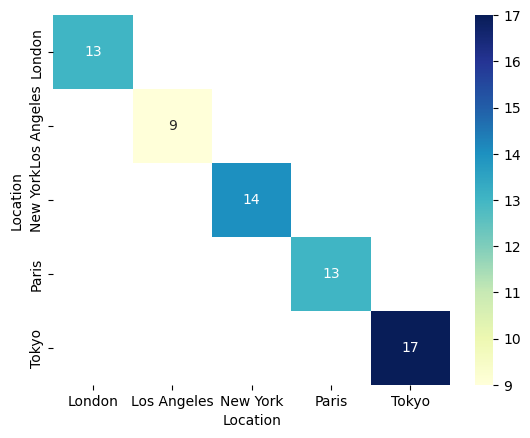

In [193]:
# Sample data: Replace with your actual data
data = {
    'Location': ['New York', 'Los Angeles', 'London', 'Paris', 'Tokyo',
                 'New York', 'Los Angeles', 'London', 'Paris', 'Tokyo',
                 'New York', 'Los Angeles', 'London', 'Paris', 'Tokyo'],
    'Count': [5, 3, 4, 2, 6, 7, 5, 3, 4, 8, 2, 1, 6, 7, 3]
}
df = pd.DataFrame(data)

# Pivot table to get the counts (or any other aggregation) in matrix form
heatmap_data = df.pivot_table(index='Location', columns='Location', values='Count', aggfunc='sum')

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar=True)

# Show the plot
plt.show()

#### Display the number of Texas Olympians over time?

In [ ]:
# Example Plot
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Create the plot
plt.plot(x, y)

# Add a title and labels
plt.title('Simple Line Chart')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')

# Show the plot
plt.show()

In [357]:
def medals_us_states(state):
    data = add_medals_bios[add_medals_bios['born_region'] == state].reset_index(drop=True)
    grouped = data.groupby('as')['total_medals'].sum().reset_index()
    final = grouped.sort_values(by='total_medals', ascending=False).reset_index(drop=True).head(25)
    return final

In [313]:
add_medals_bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,count,as,medal_Gold,medal_Silver,medal_Bronze,total_medals
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1,Jean-François Blanchy,0,0,0,0
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1,Arnaud Boetsch,0,0,0,0
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1,Jean Borotra,0,0,1,1
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1,Jacques Brugnon,0,1,0,1
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1,Albert Canet,0,0,2,2


In [369]:
medals_us_states('Texas')

,as,total_medals
0,Mal Whitfield,5
1,Josh Davis,5
2,Simone Manuel,5
3,Chad Hedrick,5
4,Charley Paddock,4
5,Michael Johnson,4
6,Jeremy Wariner,4
7,David Boudia,4
8,Mike Heath,4
9,Sheryl Swoopes,3


#### Next Question

In [372]:
results.head()

,year,type,discipline,event,as,athlete_id,noc,team,place,tied,medal,medal_count
0,1912.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,17.0,True,NaN,0
1,1912.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jean Montariol,NaN,False,NaN,0
2,1920.0,Summer,Tennis,"Singles, Men (Olympic)",Jean-François Blanchy,1,FRA,NaN,32.0,True,NaN,0
3,1920.0,Summer,Tennis,"Doubles, Mixed (Olympic)",Jean-François Blanchy,1,FRA,Jeanne Vaussard,8.0,True,NaN,0
4,1920.0,Summer,Tennis,"Doubles, Men (Olympic)",Jean-François Blanchy,1,FRA,Jacques Brugnon,4.0,False,NaN,0


In [374]:
bios.head()

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date,count
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02,1
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN,1
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17,1
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20,1
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25,1
